### Problem adaptive
The demos in the previous section solved the Daisyworld equations using the embedded Runge-Kutta methods with adaptive timestep control.

1.  Run the code and find solutions of Daisyworld with the default settings found in adapt.yaml using the timeloop5Err adaptive code

2.  Find the solutions again but this time with fixed stepsizes (you can copy and paste code for this if you don't want to code your own - be sure to read the earlier parts of the lab before attempting this question if you are stuck on how to do this!) and compare the solutions, the size of the timesteps, and the number of the timesteps between the fixed and adaptive timestep code.

3.  Given the difference in the number of timesteps, how much faster would the fixed timeloop need to be to give the same performance as the adaptive timeloop for this case?

In [1]:
# your import statements
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd

C:\Users\vicen\repos_511\numeric_2024\worksheets\Worksheets_Lab5
******************************
context imported. Front of path:
C:\Users\vicen\repos_511\numeric_2024
back of path: c:\Users\vicen\anaconda3\envs\numeric_2024\Lib\site-packages\Pythonwin
******************************

through c:\Users\vicen\repos_511\numeric_2024\worksheets\Worksheets_Lab5\context.py


In [2]:
class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

Number of Steps for Black Daisies: 23
Number of Steps for Black Daisies: 23
The time intervarls between steps are:  [ 0.          0.1         0.6         1.58587173  2.5648097   3.54374767
  4.62570395  5.12552925  6.10457804  7.08362683  8.80212314  9.66137129
 11.11521164 12.56905199 14.02289234 15.67258289 17.66208551 20.13670539
 23.34014245 27.64175396 33.40550878 36.71356993 42.84911387]


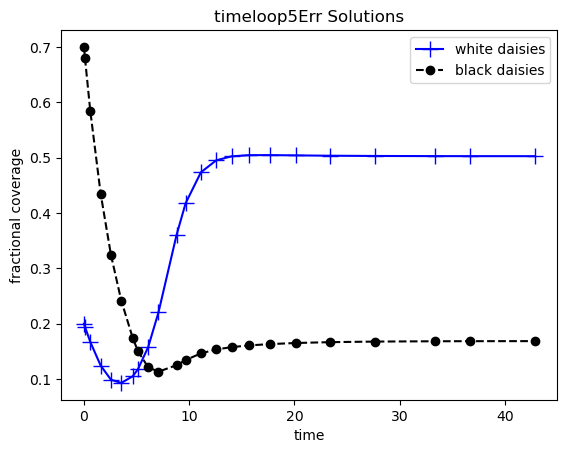

In [3]:
theSolver = Integ54('adapt.yaml')
timeVals1, yVals1, errorList1 = theSolver.timeloop5Err()

yvals1 = pd.DataFrame.from_records(yVals1, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals1, yvals1['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals1, yvals1['black'], '--ko', label='black daisies')
theAx.set_title('timeloop5Err Solutions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')
#
print('Number of Steps for Black Daisies: ' + str(len(yvals1['black'])))
print('Number of Steps for Black Daisies: ' + str(len(yvals1['white'])))
print('The time intervarls between steps are: ', timeVals1)

Number of Steps for Black Daisies: 500
Number of Steps for Black Daisies: 500
The time intervarls between steps are:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3

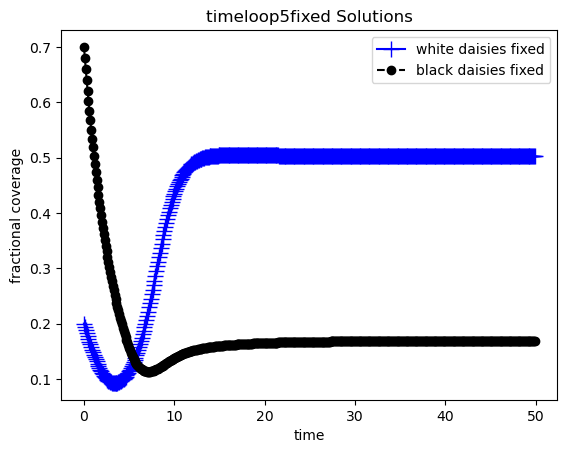

In [4]:
theSolver = Integ54('adapt.yaml')
timeVals,yVals,errorList=theSolver.timeloop5fixed()
yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies fixed')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies fixed')
theAx.set_title('timeloop5fixed Solutions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')
#
print('Number of Steps for Black Daisies: ' + str(len(yvals['black'])))
print('Number of Steps for Black Daisies: ' + str(len(yvals['white'])))
print('The time intervarls between steps are: ', timeVals)

Text(0.5, 1.0, 'Fixed stepsize vs Adaptive stepsize')

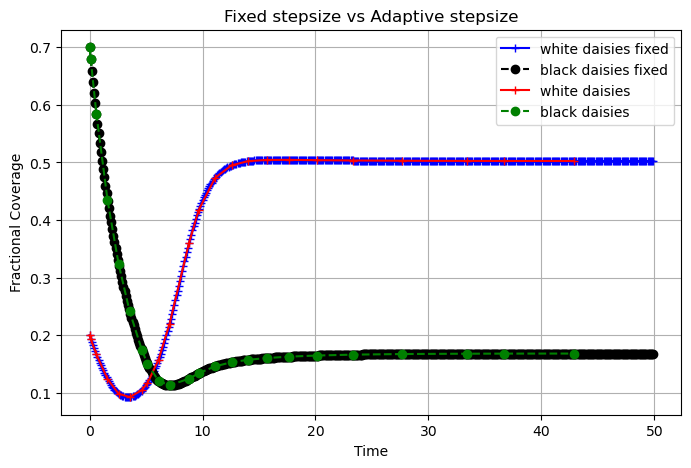

In [5]:
plt.figure(figsize=(8,5))
plt.plot(timeVals, yvals['white'], '-b+', label='white daisies fixed')
plt.plot(timeVals, yvals['black'], '--ko', label='black daisies fixed')
#
plt.plot(timeVals1, yvals1['white'], '-r+', label='white daisies')
plt.plot(timeVals1, yvals1['black'], '--go', label='black daisies')
#
plt.legend()
plt.xlabel('Time')
plt.ylabel('Fractional Coverage')
plt.grid()
plt.title('Fixed stepsize vs Adaptive stepsize')

In [6]:
print('The fixed timeloop needs to be ' + str(np.round(len(timeVals)/len(timeVals1),2)) + ' times faster to have the same performance than the adaptative timeloop, given the difference in their timesteps and since both are using the same Embedded Runke-Kutta method, meaning that they are both making the same amount of calculations per step. ')

The fixed timeloop needs to be 21.74 times faster to have the same performance than the adaptative timeloop, given the difference in their timesteps and since both are using the same Embedded Runke-Kutta method, meaning that they are both making the same amount of calculations per step. 
